# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam, SGD

In [23]:
con_df = pd.read_csv('compresive_strength_concrete.csv')

In [24]:
con_df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [25]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [26]:
con_df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [27]:
con_df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)':'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)': 'flyash',
       'Water  (component 4)(kg in a m^3 mixture)':'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine', 'Age (day)':'age',
       'Concrete compressive strength(MPa, megapascals) ':'strength'},inplace=True)

In [28]:
con_df.head()

,cement,slag,flyash,water,superplasticizer,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<AxesSubplot:>

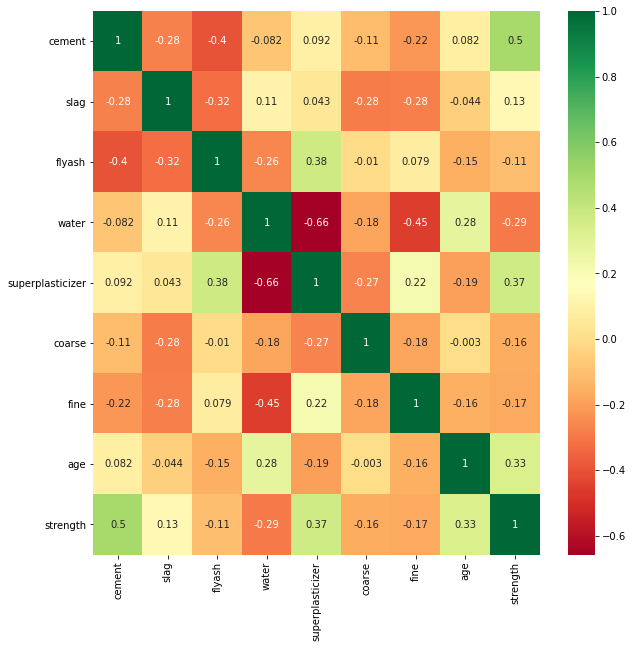

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(con_df.corr(),annot=True,cmap="RdYlGn")

In [30]:
con_df.corr()["strength"].sort_values(ascending=False)

strength            1.000000
cement              0.497832
superplasticizer    0.366079
age                 0.328873
slag                0.134829
flyash             -0.105755
coarse             -0.164935
fine               -0.167241
water              -0.289633
Name: strength, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
x = (con_df.loc[:, con_df.columns != 'strength'])
y = (con_df.loc[:, con_df.columns == 'strength'])

In [35]:
# Split to 50% Train and 50% Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)

# Split 50% Test into further 30% Test and 20% Validation
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.40, random_state=42)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(515, 8)
(309, 8)
(206, 8)


In [37]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(515, 1)
(309, 1)
(206, 1)


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
# Use MinMax Scaller to scale all features
min_max_scaler = MinMaxScaler()

In [40]:
x_train_s = min_max_scaler.fit_transform(x_train)
x_test_s = min_max_scaler.fit_transform(x_test)
x_val_s = min_max_scaler.fit_transform(x_val)

y_train_s = min_max_scaler.fit_transform(y_train)
y_test_s = min_max_scaler.fit_transform(y_test)
y_val_s = min_max_scaler.fit_transform(y_val)

In [41]:
print(x_train_s.shape)
print(x_test_s.shape)
print(x_val_s.shape)

print(y_train_s.shape)
print(y_test_s.shape)
print(y_val_s.shape)

(515, 8)
(309, 8)
(206, 8)
(515, 1)
(309, 1)
(206, 1)


In [43]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 10, activation='relu', input_dim=8))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 1, activation='relu'))

In [44]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics = ['mae'])

In [45]:
model.fit(
    x_train_s, y_train_s, epochs = 100,
    validation_data = (x_val_s, y_val_s)
)

Epoch 1/100
17/17 [==============================] - 1s 15ms/step - loss: 0.2008 - mae: 0.3909 - val_loss: 0.1493 - val_mae: 0.3197
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1351 - mae: 0.2993 - val_loss: 0.1009 - val_mae: 0.2503
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0836 - mae: 0.2266 - val_loss: 0.0708 - val_mae: 0.2096
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0652 - mae: 0.1968 - val_loss: 0.0617 - val_mae: 0.1960
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0550 - mae: 0.1827 - val_loss: 0.0576 - val_mae: 0.1898
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0511 - mae: 0.1757 - val_loss: 0.0540 - val_mae: 0.1850
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0470 - mae: 0.1712 - val_loss: 0.0506 - val_mae: 0.1799
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0442 - 

17/17 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0829 - val_loss: 0.0184 - val_mae: 0.1062
Epoch 64/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0115 - mae: 0.0819 - val_loss: 0.0179 - val_mae: 0.1002
Epoch 65/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0112 - mae: 0.0816 - val_loss: 0.0198 - val_mae: 0.1116
Epoch 66/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0111 - mae: 0.0819 - val_loss: 0.0174 - val_mae: 0.0992
Epoch 67/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0095 - mae: 0.0756 - val_loss: 0.0182 - val_mae: 0.0995
Epoch 68/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0109 - mae: 0.0812 - val_loss: 0.0187 - val_mae: 0.1084
Epoch 69/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0785 - val_loss: 0.0184 - val_mae: 0.1075
Epoch 70/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0114 - mae: 0

In [46]:
model.evaluate(x_test_s, y_test_s)

10/10 [==============================] - 0s 731us/step - loss: 0.0111 - mae: 0.0804


[0.011126205325126648, 0.08042632788419724]

In [47]:
predictions = model.predict(x_test_s)
predictions = min_max_scaler.inverse_transform(predictions)

In [48]:
print(len(predictions))
print(len(x_test_s))

309
309


In [49]:
predictions

array([[17.069925 ],
       [19.855509 ],
       [36.89779  ],
       [41.707767 ],
       [51.65959  ],
       [63.912785 ],
       [41.691135 ],
       [13.911135 ],
       [37.06393  ],
       [15.846306 ],
       [50.828842 ],
       [35.157387 ],
       [24.7514   ],
       [53.61712  ],
       [52.063137 ],
       [25.605017 ],
       [34.534653 ],
       [31.613424 ],
       [50.137917 ],
       [33.086838 ],
       [32.78004  ],
       [42.00757  ],
       [34.594303 ],
       [42.312183 ],
       [44.005753 ],
       [54.002678 ],
       [30.97351  ],
       [36.356678 ],
       [21.802755 ],
       [47.263607 ],
       [55.270653 ],
       [27.713097 ],
       [38.69556  ],
       [27.556118 ],
       [43.324055 ],
       [41.447727 ],
       [52.045654 ],
       [27.376205 ],
       [20.67542  ],
       [13.659367 ],
       [20.275904 ],
       [52.503838 ],
       [42.23975  ],
       [17.545872 ],
       [41.7088   ],
       [29.646227 ],
       [42.737354 ],
       [34.37

In [50]:
y_test['strength'].values

array([24.45, 22.72, 40.29, 34.9 , 44.52, 71.3 , 43.57, 15.04, 41.67,
       21.26, 55.06, 39.59, 24.  , 66.78, 53.3 , 25.73, 30.88, 26.14,
       51.06, 29.72, 35.75, 53.52, 28.99, 49.77, 55.55, 67.7 , 25.12,
       38.46, 17.6 , 43.58, 36.3 , 34.67, 43.25, 31.64, 60.32, 37.36,
       57.23, 24.34, 20.73, 14.6 , 19.77, 35.3 , 51.04, 20.08, 38.8 ,
       23.69, 23.35, 31.54, 15.69, 55.9 , 48.28, 31.27, 13.66, 13.46,
       19.99, 24.58, 26.86, 37.43, 13.2 , 13.29, 26.32, 29.98, 53.46,
       31.35, 31.25,  7.32, 34.56, 45.71, 23.85, 51.43, 32.72, 18.75,
       76.8 , 79.3 , 36.3 , 68.75, 39.29, 29.59, 31.12, 43.5 , 17.54,
       17.54, 37.42, 71.3 , 32.4 , 31.81, 25.22, 23.52, 63.53, 17.95,
       17.58, 11.41, 32.66, 23.74, 28.63, 30.28, 36.45, 46.93, 67.31,
       37.81, 33.95, 79.99, 42.13, 43.89, 33.27, 33.4 , 31.74, 15.09,
       21.54, 39.05, 61.07, 19.77, 67.11, 41.05, 43.7 , 41.3 , 49.2 ,
       22.95, 29.59, 30.12, 12.79, 77.3 , 71.7 , 13.09, 10.03, 21.6 ,
       18.03, 39.09,

In [51]:
# Get Root Mean Squared Error (RMSE), lower the better
rmse = np.sqrt( np.mean(predictions - y_test['strength'].values) **2 )
print(rmse)

0.5159287208878107


In [53]:
y_train['Type'] = 'Train'

In [54]:
y_test['Type'] = 'Test'

In [55]:
pred = pd.DataFrame(data = predictions,index = y_test.index, columns=['Predcited Strength'])

In [56]:
plot = pd.DataFrame()
plot = pd.concat([y_train,y_test])
plot = plot.merge(pred,how='left',left_index=True, right_index=True)

In [57]:
plot

,strength,Type,Predcited Strength
417,12.18,Train,NaN
89,39.30,Train,NaN
958,49.77,Train,NaN
901,29.87,Train,NaN
633,14.20,Train,NaN
...,...,...,...
682,24.05,Test,19.174669
464,56.81,Test,53.641407
259,13.33,Test,17.026638
638,38.21,Test,32.487984


In [58]:
plot_s = plot.reset_index()

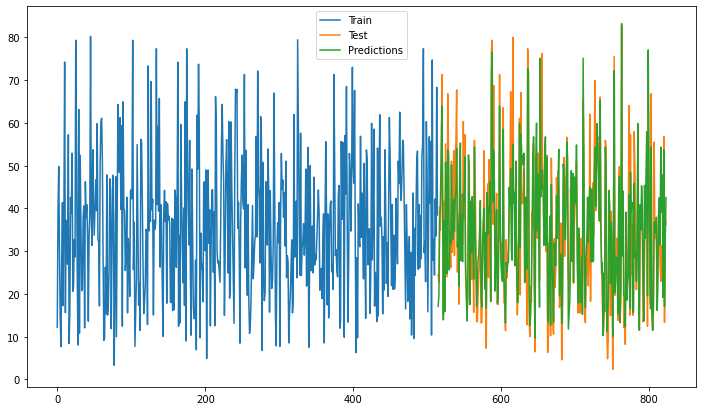

In [59]:
plt.figure(figsize=(12,7))
plt.plot(plot_s[plot_s.Type == 'Train']['strength'],label='Train')
plt.plot(plot_s[plot_s.Type == 'Test']['strength'],label='Test')
plt.plot(plot_s['Predcited Strength'],label='Predictions')
plt.legend()
plt.show()